In [2]:
import requests
import pandas
import matplotlib.pyplot as plt

In [3]:
def convert_covjson_to_dataframe(data):
    if data["type"] != "Coverage" or data["domain"]["domainType"] != "PointSeries":
        raise Exception("Unsupported CoverageJSON. Domain is not of type PointSeries")

    domain = data["domain"]
    parameters = data["parameters"]
    ranges = data["ranges"]

    if len(domain["axes"]["x"]["values"]) > 1 or len(domain["axes"]["y"]["values"]) > 1:
        raise Exception("Unsupported: Multiple stations")

    # Extract columns and timestamps
    columns = parameters.keys()
    index = domain["axes"]["t"]["values"]

    # Extract data
    values = {}
    for c in columns:
        values[c] = ranges[c]["values"]

    df = pandas.DataFrame(values, columns=columns, index=index)

    # Convert index to datetime
    df.index = pandas.to_datetime(df.index)

    return df


In [7]:
collection = "observations"
base_url = f"https://api.dataplatform.knmi.nl/edr/collections/{collection}"
token = ""
headers = {
    'Authorization': token
}
datetime = '2023-07-05T00:00:00Z/2023-07-05T12:00:00Z'

In [8]:
 # IJmuiden WP
ijmuiden = "06225"
params = {
    'datetime': datetime,
    # Wind, speed, actual maximum
    'parameter-name': 'fx_10m_10,dd_10'
}

r = requests.get(base_url + "/locations/" + ijmuiden , params, headers=headers)
r.raise_for_status()
df = convert_covjson_to_dataframe(r.json())
df

,dd_10,fx_10m_10
2023-07-05 00:00:00+00:00,93.5,9.13
2023-07-05 00:10:00+00:00,96.2,8.33
2023-07-05 00:20:00+00:00,104.8,8.84
2023-07-05 00:30:00+00:00,103.5,13.15
2023-07-05 00:40:00+00:00,104.2,10.74
...,...,...
2023-07-05 11:20:00+00:00,279.0,19.22
2023-07-05 11:30:00+00:00,282.1,18.99
2023-07-05 11:40:00+00:00,279.4,17.73
2023-07-05 11:50:00+00:00,271.6,17.53


Get your API token from here (choose EDR): https://developer.dataplatform.knmi.nl/apis/

Maximum wind speed (gusts) in IJmuiden (km/h)

In [9]:
 df['fx_10m_10'].max()*3.6

146.196

<Axes: ylabel='Wind speed gusts (m/s)'>

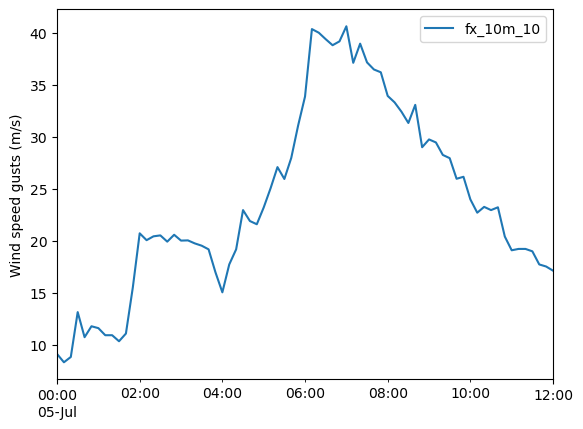

In [10]:
ax = df.plot(y='fx_10m_10')
ax.set_ylabel("Wind speed gusts (m/s)")
ax

In [12]:
# Den Helder (De Kooy)
den_helder = "06235"
params = {
    'datetime': datetime,
    # Air pressure, Wind speed actual maximum, Wind direction
    'parameter-name': 'p_nap_msl_10,fx_10m_10,dd_10'
}
r = requests.get(base_url + "/locations/" + den_helder , params, headers=headers)
r.raise_for_status()
df = convert_covjson_to_dataframe(r.json())
df

,dd_10,p_nap_msl_10,fx_10m_10
2023-07-05 00:00:00+00:00,112.3,1004.23,7.73
2023-07-05 00:10:00+00:00,98.2,1003.73,6.47
2023-07-05 00:20:00+00:00,102.0,1003.63,7.83
2023-07-05 00:30:00+00:00,100.6,1003.13,7.92
2023-07-05 00:40:00+00:00,95.7,1002.83,7.71
...,...,...,...
2023-07-05 11:20:00+00:00,290.3,1004.43,21.59
2023-07-05 11:30:00+00:00,292.4,1004.73,20.10
2023-07-05 11:40:00+00:00,288.9,1005.23,19.61
2023-07-05 11:50:00+00:00,294.7,1005.53,18.68


<Axes: ylabel='Pressure (hPa)'>

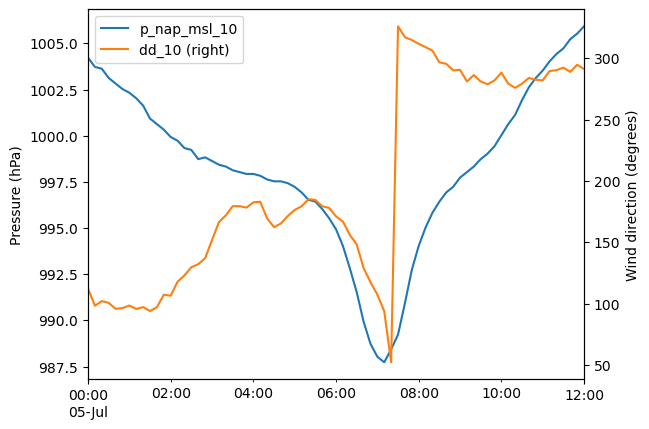

In [15]:
ax = df.plot(y='p_nap_msl_10')
ax.set_ylabel("Pressure (hPa)")
ax2 = df.plot(y='dd_10', ax=ax, secondary_y=True)
ax2.set_ylabel("Wind direction (degrees)")
ax

<Axes: ylabel='Wind speed gusts (m/s)'>

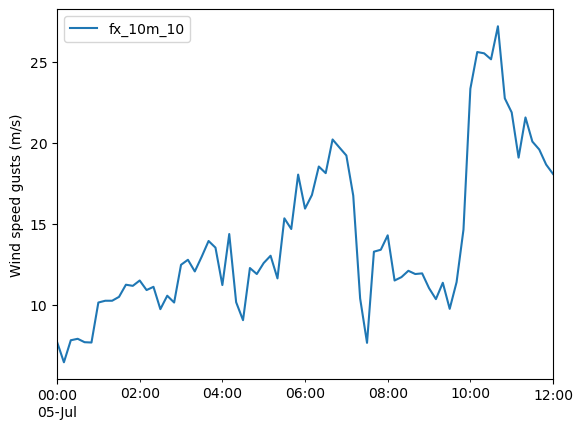

In [14]:
ax = df.plot(y='fx_10m_10')
ax.set_ylabel("Wind speed gusts (m/s)")
ax